In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [57]:
df = pd.read_csv('train.csv')

In [58]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16723,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


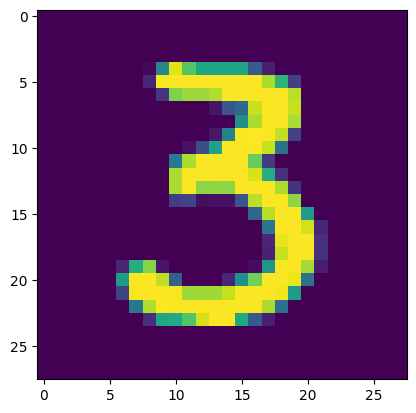

In [33]:
plt.imshow(df.iloc[23285, 1:].values.reshape(28,28))

In [59]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

10.34248399734497


In [41]:
accuracy_score(y_test ,y_pred) 

0.9651190476190477

# using PCA

In [43]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [66]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [78]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [79]:
x_train_trf.shape

(33600, 10)

In [80]:
knn = KNeighborsClassifier()

In [81]:
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [82]:
y_pred = knn.predict(x_test_trf)

In [83]:
accuracy_score(y_test, y_pred)

0.9039285714285714